<a href="https://colab.research.google.com/github/venkat2ram/Python/blob/master/NN_using_Numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn.datasets import fetch_openml

Data=fetch_openml('mnist_784')

In [0]:
X,y1=Data["data"]/1000,Data["target"]

In [0]:
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt

def show_imag(X,y,position):
  img=X[position]
  imag=img.reshape(int(np.sqrt(img.size)),int(np.sqrt(img.size)))
  plt.imshow(imag,cmap = matplotlib.cm.binary, interpolation="nearest")
  plt.show()
  print(y[position]) 

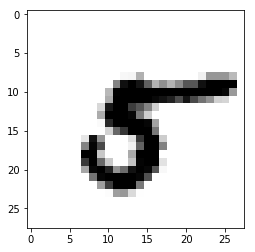

5


In [5]:
show_imag(X,y1,69998)

In [0]:
def convert_binary(y):
  y1=np.zeros((len(y),10))
  for i in range(len(y)):
    y1[i][int(y[i])]=1
    
    
  return y1